In [4]:
import numpy as np
import matplotlib.pyplot as plt
%run IDM_helper_functions.ipynb

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

from sbi.inference import MNLE
from pyro.distributions import InverseGamma
from torch.distributions import Beta, Binomial, Gamma
from sbi.utils import MultipleIndependent

from sbi.inference import MCMCPosterior, VIPosterior, RejectionPosterior
from sbi.utils.torchutils import atleast_2d

from sbi.utils import mcmc_transform
from sbi.inference.potentials.base_potential import BasePotential

In [2]:
W_pos, W_neg = 52500, 8400
B1, B2 = 0, 0
N, theta = 2000, 51450

y1, y2 = 0.2, 0.2
beta=1/24
print(energy(y1,y2))
print(dEdy1(y1, y2, W_pos, W_neg, B1, theta))
print(dEdy2(y1,y2, W_pos, W_neg, B2, theta))
print(free_energy(y1,y2,N=2000))
print(dFdy1(y1,y2, W_pos, W_neg, B1, theta, beta, N))
print(dFdy2(y1,y2, W_pos, W_neg, B2, theta, beta, N))

16716.0
32130.0
32130.0
-7303.316329833018
-1141.064666877377
-1141.064666877377


In [23]:
# Training data
num_simulations = 30000
prior = utils.BoxUniform(low=[0.1,0.2,0.1, 0.005,0.0005], high=[0.6,0.6,0.6,0.05,0.005])
parameters = prior.sample((num_simulations,))
x = simul_IDM_CG_five_param(np.array(parameters))

In [24]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()


 Neural network successfully converged after 36 epochs.

In [10]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")


## Simulate from IDM and fit from IDM

In [25]:
Cs = np.random.uniform(low=0, high=0.4, size=30)
hs = np.random.uniform(low=0.2, high=0.6, size=30)
ters = np.random.uniform(low=0.1, high=0.6, size=30)
sigmas = np.random.uniform(low=0.005, high=0.05, size=30)
dts = np.random.uniform(low=0.0005, high=0.005, size=30)

n_trials = 100
num_samples = 100
par_fitted_IDM = np.zeros((30,5))


In [26]:
#plt.scatter(0,0)
#plt.xlim(0,0.5)
#plt.ylim(0,0.5)
#plt.show()

for i in range(len(Cs)):
    print(i)
    IDM_o = simul_IDM_CG_five_param(np.tile((Cs[i], hs[i], ters[i], sigmas[i], dts[i]), (n_trials,1))) # simulate IDM data
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.4,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    #mnle_samples = mnle_posterior.sample((num_samples,), x=DDM_o) # fit with IDM
    
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted_IDM[i,:] = np.array(mnle_map)
    #plt.scatter(Cs[i],mnle_map[0])
    #plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


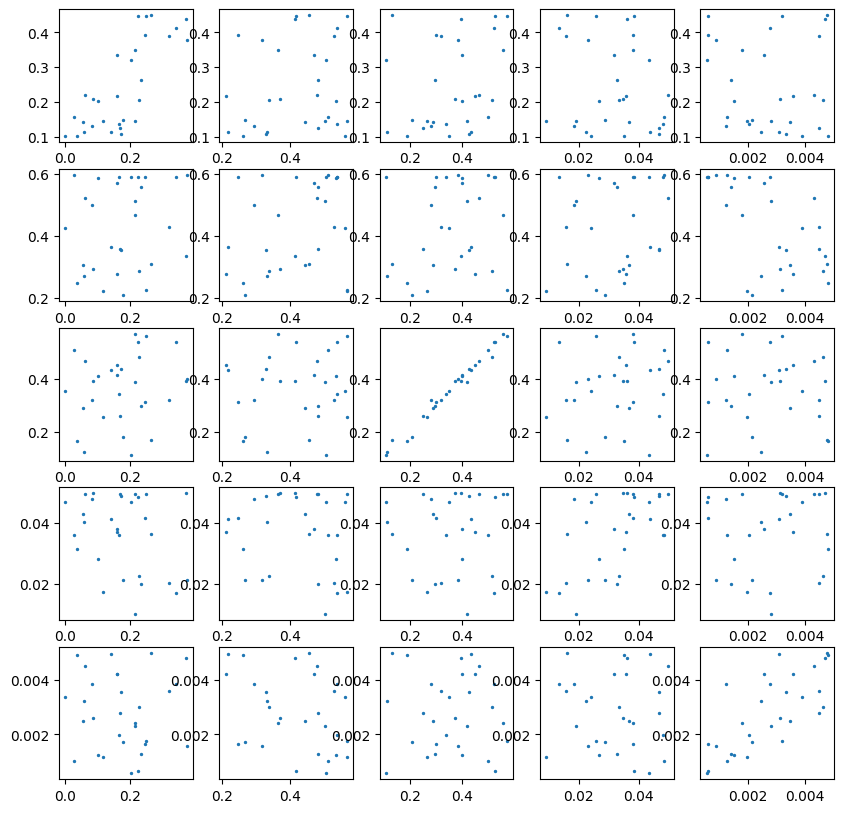

In [28]:

sim_num = 30
fig, axes = plt.subplots(5, 5, figsize=(10,10))

axes[0,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)

axes[1,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)

axes[2,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)

axes[3,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)

axes[4,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)

#ax1.set_title("C")
#ax2.set_title("h")
#ax3.set_title("ter")

#ax1.set_ylabel("C", rotation=0)
#ax4.set_ylabel("h", rotation=0)
#ax7.set_ylabel("ter", rotation=0)

In [30]:
Cs = np.random.uniform(low=0, high=0.4, size=30)
hs = np.random.uniform(low=0.2, high=0.6, size=30)
ters = np.random.uniform(low=0.1, high=0.6, size=30)
sigmas = np.random.uniform(low=0.005, high=0.05, size=30)
dts = np.random.uniform(low=0.0005, high=0.005, size=30)

n_trials = 1000
num_samples = 100
par_fitted_IDM = np.zeros((30,5))


In [31]:
#plt.scatter(0,0)
#plt.xlim(0,0.5)
#plt.ylim(0,0.5)
#plt.show()

for i in range(len(Cs)):
    print(i)
    IDM_o = simul_IDM_CG_five_param(np.tile((Cs[i], hs[i], ters[i], sigmas[i], dts[i]), (n_trials,1))) # simulate IDM data
    
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.4,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    #mnle_samples = mnle_posterior.sample((num_samples,), x=DDM_o) # fit with IDM
    
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    
    par_fitted_IDM[i,:] = np.array(mnle_map)
    #plt.scatter(Cs[i],mnle_map[0])
    #plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Optimization was interrupted after 638 iterations. 
21



KeyboardInterrupt



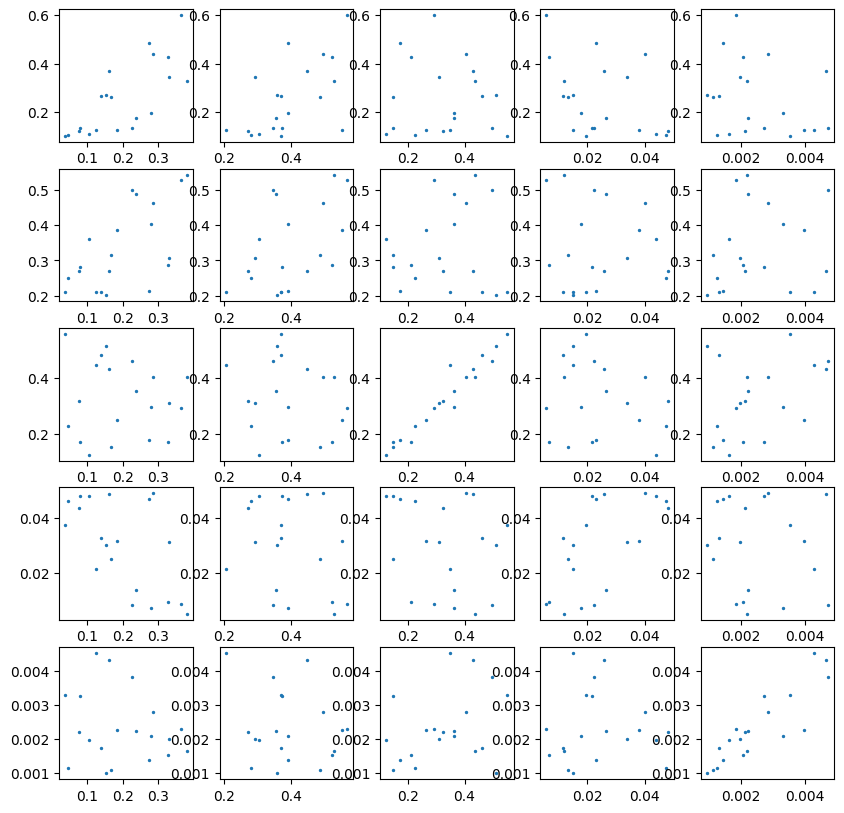

In [32]:

sim_num = 20
fig, axes = plt.subplots(5, 5, figsize=(10,10))

axes[0,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)
axes[0,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,0], s = 2)

axes[1,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)
axes[1,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,1], s = 2)

axes[2,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)
axes[2,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,2], s = 2)

axes[3,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)
axes[3,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,3], s = 2)

axes[4,0].scatter(Cs[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,1].scatter(hs[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,2].scatter(ters[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,3].scatter(sigmas[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)
axes[4,4].scatter(dts[0:sim_num], par_fitted_IDM[0:sim_num,4], s = 2)

#ax1.set_title("C")
#ax2.set_title("h")
#ax3.set_title("ter")

#ax1.set_ylabel("C", rotation=0)
#ax4.set_ylabel("h", rotation=0)
#ax7.set_ylabel("ter", rotation=0)